In [1]:
import sys
sys.path.append('../..')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wildlife_datasets.datasets import AnimalCLEF2025, WildlifeReID10k
import torchvision.transforms as T

os.makedirs('results', exist_ok=True)
n_rows = 4
transform1 = T.Compose([T.Resize(size=(512, 512))])
transform2 = T.Compose([T.Resize(size=(512, 256))])
root = '/data/wildlife_datasets/data/WildlifeReID10k'
d = WildlifeReID10k(root, transform=transform1)

In [2]:
counts = {}
for name, df_split in d.df.groupby('split'):
    counts[name] = df_split['identity'].value_counts().to_numpy()
counts = pd.DataFrame({
    'i': range(len(counts['train'])),
    'n_train': pd.Series(np.log10(counts['train'])),
    'n_test': pd.Series(np.log10(counts['test'])),
})
counts = counts.iloc[np.arange(0, len(counts), 10)]
counts = counts.to_csv('results/identity_counts.csv', index=False)

In [3]:
from wildlife_datasets.splits import analyze_split

idx_train = np.where(d.df['split'] == 'train')[0]
idx_test = np.where(d.df['split'] == 'test')[0]
analyze_split(d.df, idx_train, idx_test)

Split: time-unaware open-set
Samples: train/test/unassigned/total = 109927/30561/0/140488
Classes: train/test/unassigned/total = 10249/8391/0/10772
Samples: train only/test only        = 8683/7816
Classes: train only/test only/joint  = 2381/523/7868

Fraction of train set     = 78.25%
Fraction of test set only = 5.56%


In [4]:
names_ignore = [
    'AAUZebraFish',
    'BirdIndividualID',
    'Chicks4FreeID',
    'CTai',
    'Cows2021',
    'FriesianCattle2015',
    'FriesianCattle2017',
    'OpenCows2020',
    'PrimFace',
    'SMALST',
    'SouthernProvinceTurtles',
]
names_ignore = names_ignore + [
    'AerialCattle2017',
    'BelugaID',
    'CatIndividualImages',
    'MPDD',
    'MultiCamCows2024',
    'ReunionTurtles',
]

idx = []
for name, df_dataset in d.df.groupby('dataset'):
    if name not in names_ignore:
        idx = idx + [df_dataset.index[0]]

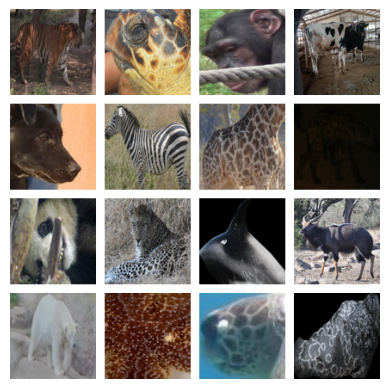

In [5]:
d.plot_grid(idx=idx, n_rows=n_rows, n_cols=n_rows, background_color=(255, 255, 255));
plt.savefig('results/grid1.png', bbox_inches='tight', dpi=600)

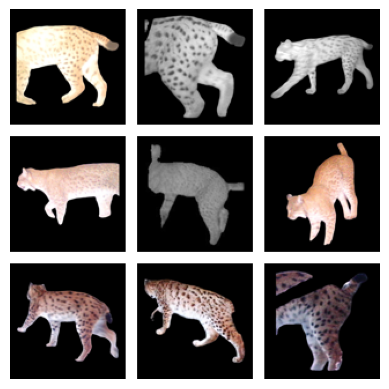

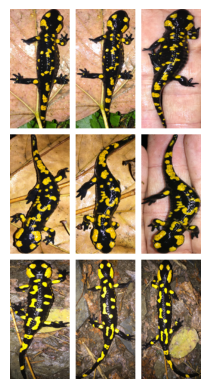

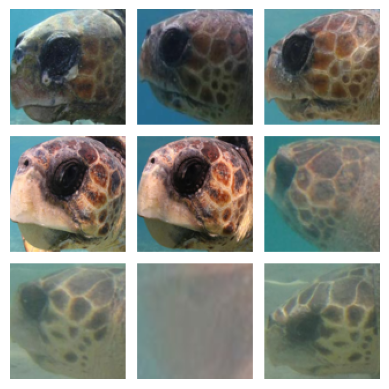

In [12]:
n_rows = 3
n_cols = 3
root = '/data/wildlife_datasets/data/AnimalCLEF2025'
d = AnimalCLEF2025(root, transform=transform1)
info = {
    'LynxID2025': (10, transform1),
    'SalamanderID2025': (5, transform2),
    'SeaTurtleID2022': (10, transform1)
}
for name, df_dataset in d.df.groupby('dataset'):
    i = 0
    idx = []
    k_start, d.transform = info[name]
    for k, (identity, df_identity) in enumerate(df_dataset.groupby('identity')):
        if k < k_start:
            continue
        if name in ['LynxID2025', 'SeaTurtleID2022']:
            df_identity = df_identity[df_identity['orientation'] == 'left']
        if len(df_identity) >= n_rows:
            idx = idx + [df_identity.index[:n_rows]]
            i += 1
            if i == n_rows:
                break
    d.plot_grid(idx=idx, n_rows=n_rows, n_cols=n_cols, background_color=(255, 255, 255));
    plt.savefig(f'results/grid_{name}.png', bbox_inches='tight', dpi=1200)


In [7]:
for name, df_split in d.df.groupby('split'):
    print(name, len(df_split), df_split['identity'].nunique())

database 13074 1102
query 2135 679
